## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [220]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [221]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv')

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [222]:
quantitative_features = data.select_dtypes(include=['int64'])
quantitative_features

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


In [223]:
bin = [col for col in data.columns if len(data[col].value_counts()) == 2]
bin_features = data[bin]
bin_features

,people_liable,telephone,foreign_worker,credit_risk
0,0 to 2,no,no,good
1,3 or more,no,no,good
2,0 to 2,no,no,good
3,3 or more,no,yes,good
4,0 to 2,no,yes,good
...,...,...,...,...
995,3 or more,no,no,bad
996,0 to 2,no,no,bad
997,0 to 2,yes (under customer name),no,bad
998,0 to 2,yes (under customer name),no,bad


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [224]:
data.groupby('purpose')['amount'].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [225]:
print((data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0]) * 100)
print((data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0]) * 100)

66.66666666666666
68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [226]:
foreign = data[data['foreign_worker'] == 'yes']
foreign[foreign['number_credits'] == '4-5'].shape[0]

1

### Задание 6 (1 балл)

In [227]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

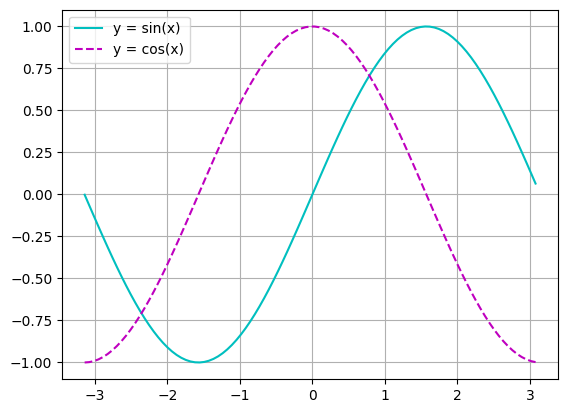

In [228]:
x = np.arange(-3.14, 3.14, 6.28 / 99)
plt.plot(x, np.sin(x), label = "y = sin(x)", color = "c")
plt.plot(x, np.cos(x), linestyle="--", label = "y = cos(x)", color = "m")
plt.grid(True)
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

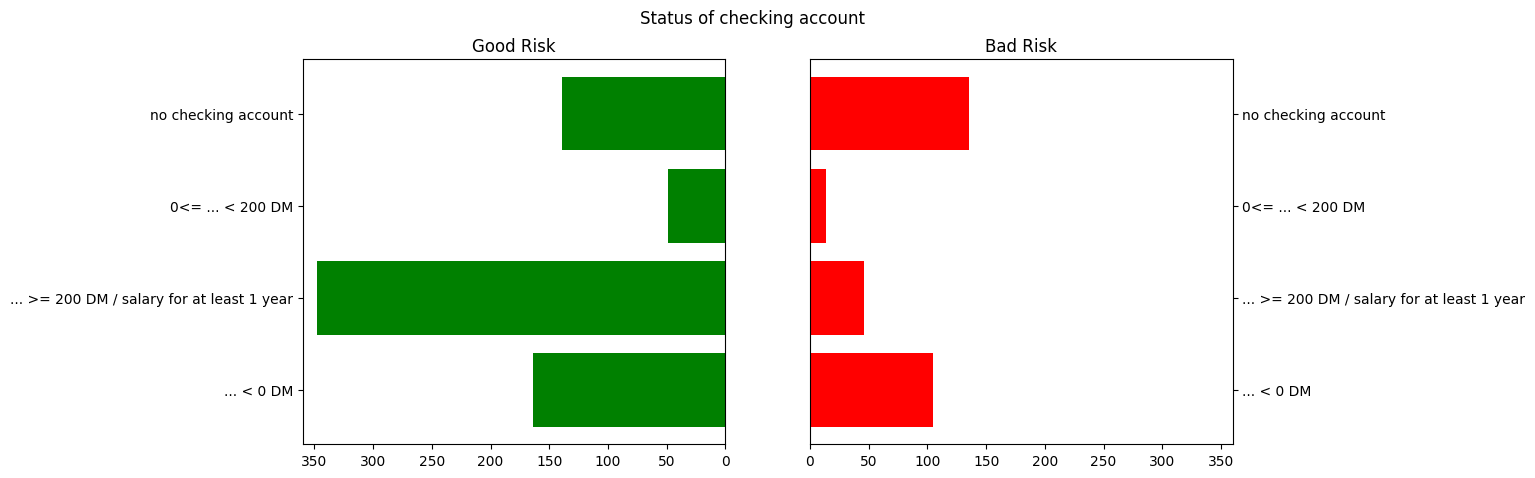

In [229]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Status of checking account')

good_risk = data[data['credit_risk'] == 'good']
good_risk = good_risk.groupby('status')['credit_risk'].count()
ax1.set_title('Good Risk')
ax1.barh(good_risk.index, good_risk.values, color = 'g')
ax1.set_xlim([360, 0])

bad_risk = data[data['credit_risk'] == 'bad']
bad_risk = bad_risk.groupby('status')['credit_risk'].count()
ax2.set_title('Bad Risk')
ax2.barh(bad_risk.index, bad_risk.values, color = 'r')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_xlim([0, 360])

plt.show()

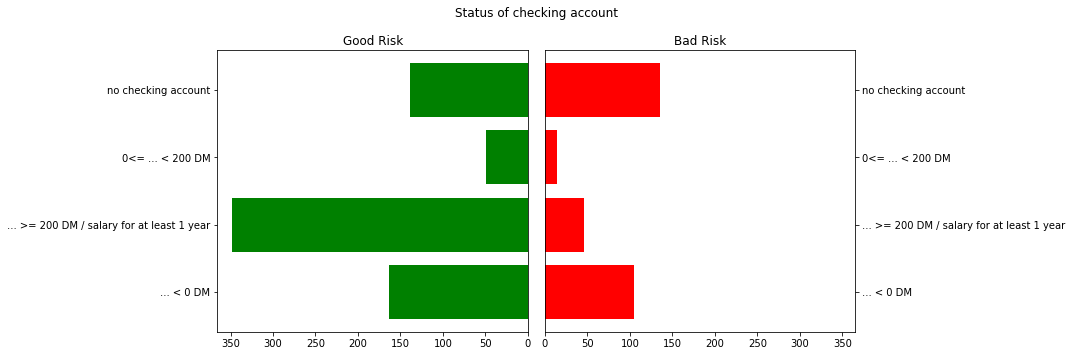

### Задание 8  (0.5 балла)

In [230]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<Axes: xlabel='savings', ylabel='count'>

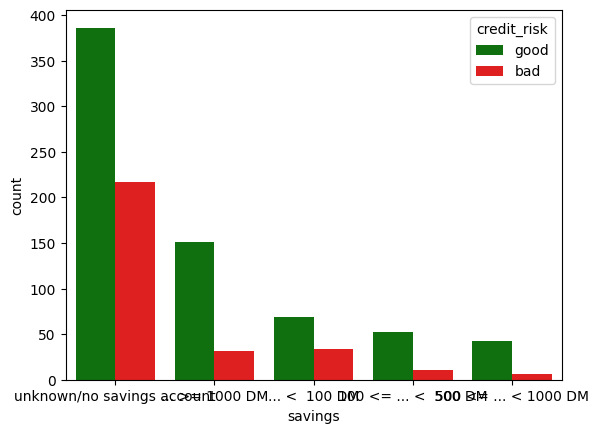

In [231]:
df = data[['savings', 'credit_risk']].value_counts().reset_index()
sns.barplot(x='savings', y='count', hue = 'credit_risk', data = df, palette = ['g', 'r'])

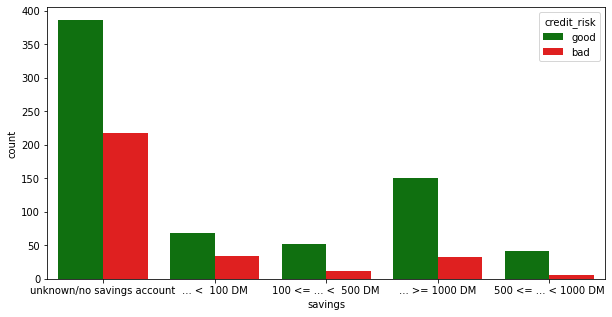

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<Axes: xlabel='savings', ylabel='age'>

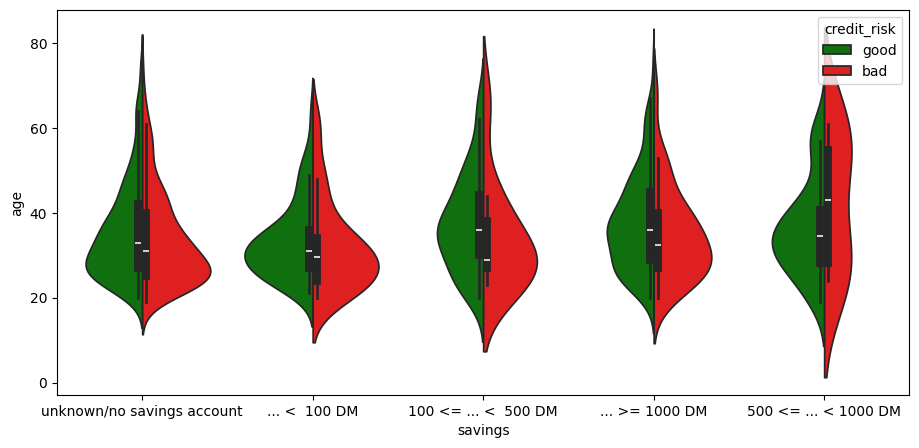

In [232]:
plt.subplots(figsize = (11,5))
sns.violinplot (x='savings', y='age', hue = 'credit_risk', data = data, split=True, palette = ['g', 'r'])

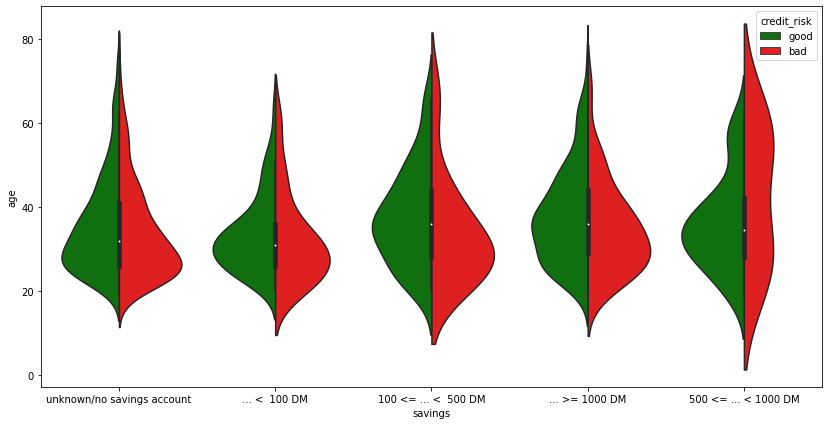

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

In [233]:
data[['age', 'credit_risk']].value_counts().reset_index()

,age,credit_risk,count
0,27,good,37
1,26,good,35
2,36,good,34
3,35,good,34
4,30,good,29
...,...,...,...
95,68,good,1
96,70,good,1
97,74,bad,1
98,19,good,1


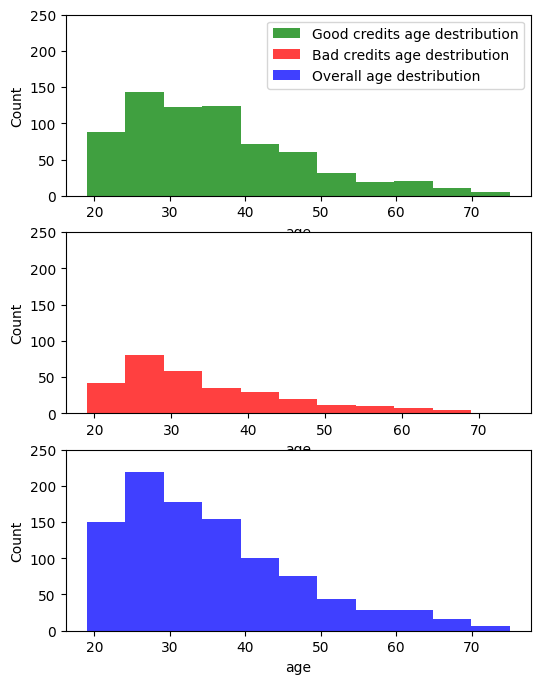

In [234]:
good_risk = data[data['credit_risk'] == 'good']
bad_risk = data[data['credit_risk'] == 'bad']

fig, ax = plt.subplots(nrows=3, figsize=(6, 8))

sns.histplot(x = 'age', data=good_risk, color='g', binwidth=5, edgecolor=None, ax = ax[0], label='Good credits age destribution')
ax[0].set(ylim = (0, 250))

sns.histplot(x = 'age', data=bad_risk, color='r', binwidth=5, edgecolor=None, ax = ax[1], label='Bad credits age destribution')
ax[1].set(ylim = (0, 250))

sns.histplot(x = 'age', data=data, color='b', binwidth=5, edgecolor=None, ax = ax[2], label='Overall age destribution')
ax[2].set(ylim = (0, 250))

handles_0, labels_0 = ax[0].get_legend_handles_labels()
handles_1, labels_1 = ax[1].get_legend_handles_labels()
handles_2, labels_2 = ax[2].get_legend_handles_labels()

handles = handles_0 + handles_1 + handles_2
labels = labels_0 + labels_1 + labels_2

ax[0].legend(handles, labels)

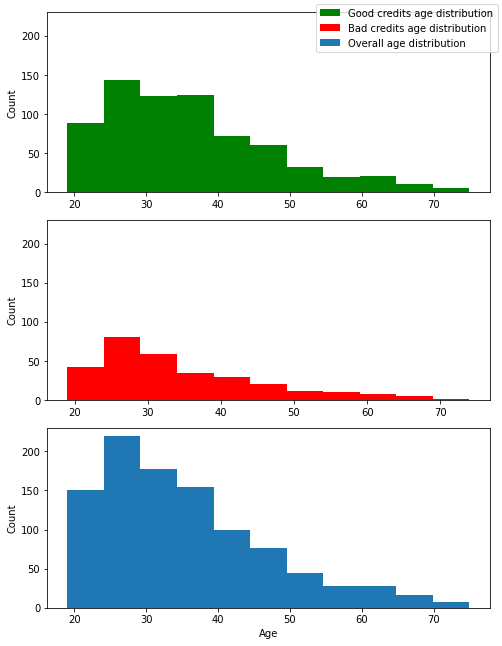

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

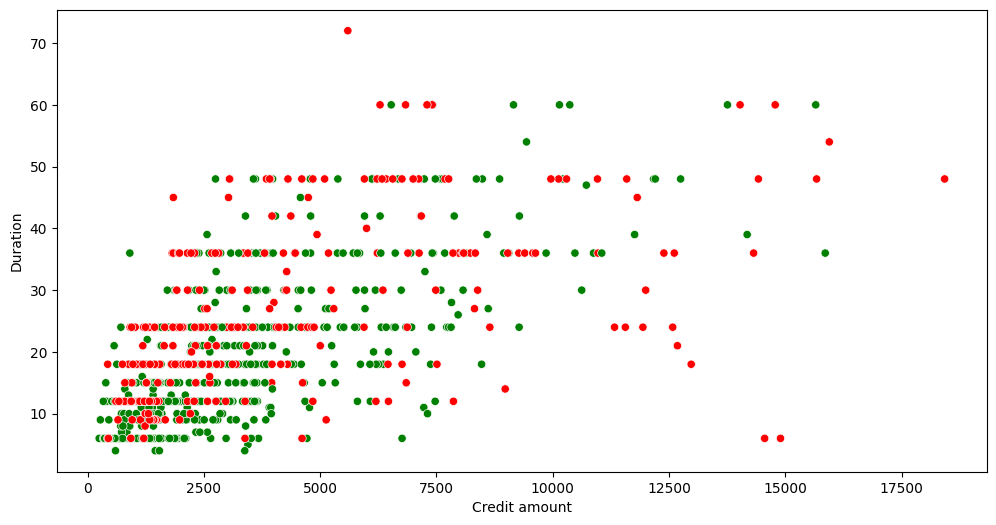

In [235]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=['g', 'r'], legend = False)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')


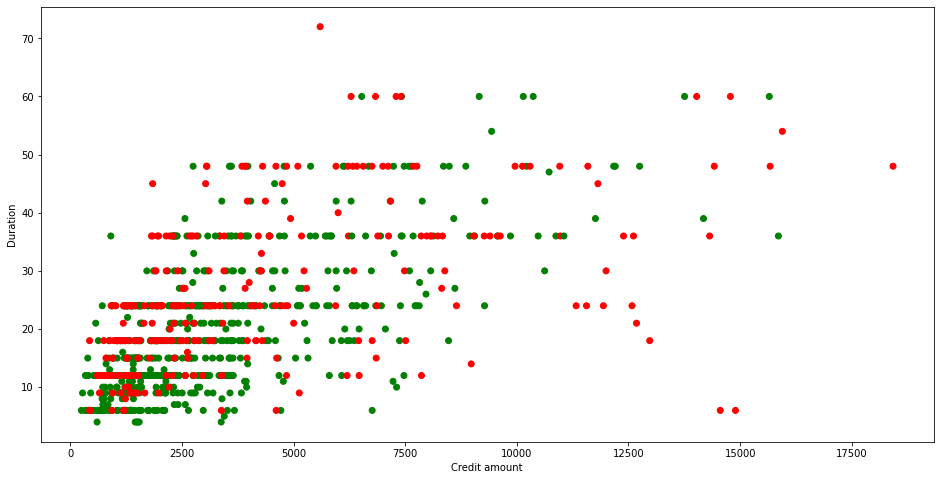

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0, 'Age')

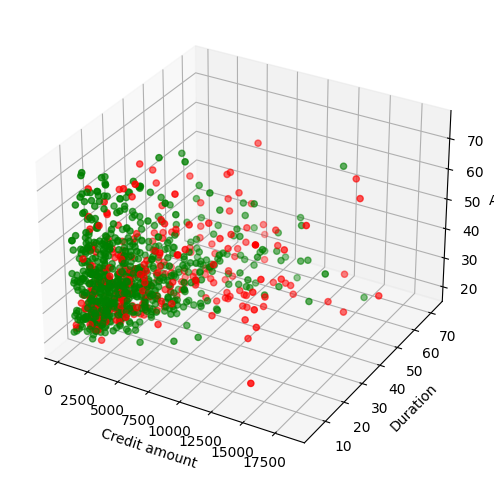

In [236]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(xs='amount', ys='duration',zs='age', data=data, c=data['credit_risk'].map({'good': 'g', 'bad': 'r'}))
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

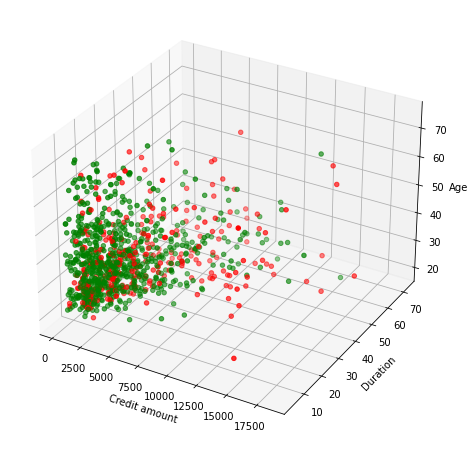

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [237]:
data = data.drop(['status', 'credit_history', 'purpose', 'savings', 'employment_duration', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], axis=1)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data[['installment_rate', 'present_residence', 'number_credits', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']] = data[['installment_rate', 'present_residence', 'number_credits', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']].apply(label.fit_transform)

In [238]:
data

,duration,amount,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,2,3,21,0,0,0,0,1
1,9,2799,1,0,36,1,1,0,0,1
2,12,841,1,3,23,0,0,0,0,1
3,12,2122,0,0,39,1,1,0,1,1
4,12,2171,2,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,24,1987,1,3,21,0,1,0,0,0
996,24,2303,2,2,45,0,0,0,0,0
997,21,12680,2,3,30,0,0,1,0,0
998,12,6468,1,2,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

<Axes: title={'center': 'Pearson Correlation of Features'}>

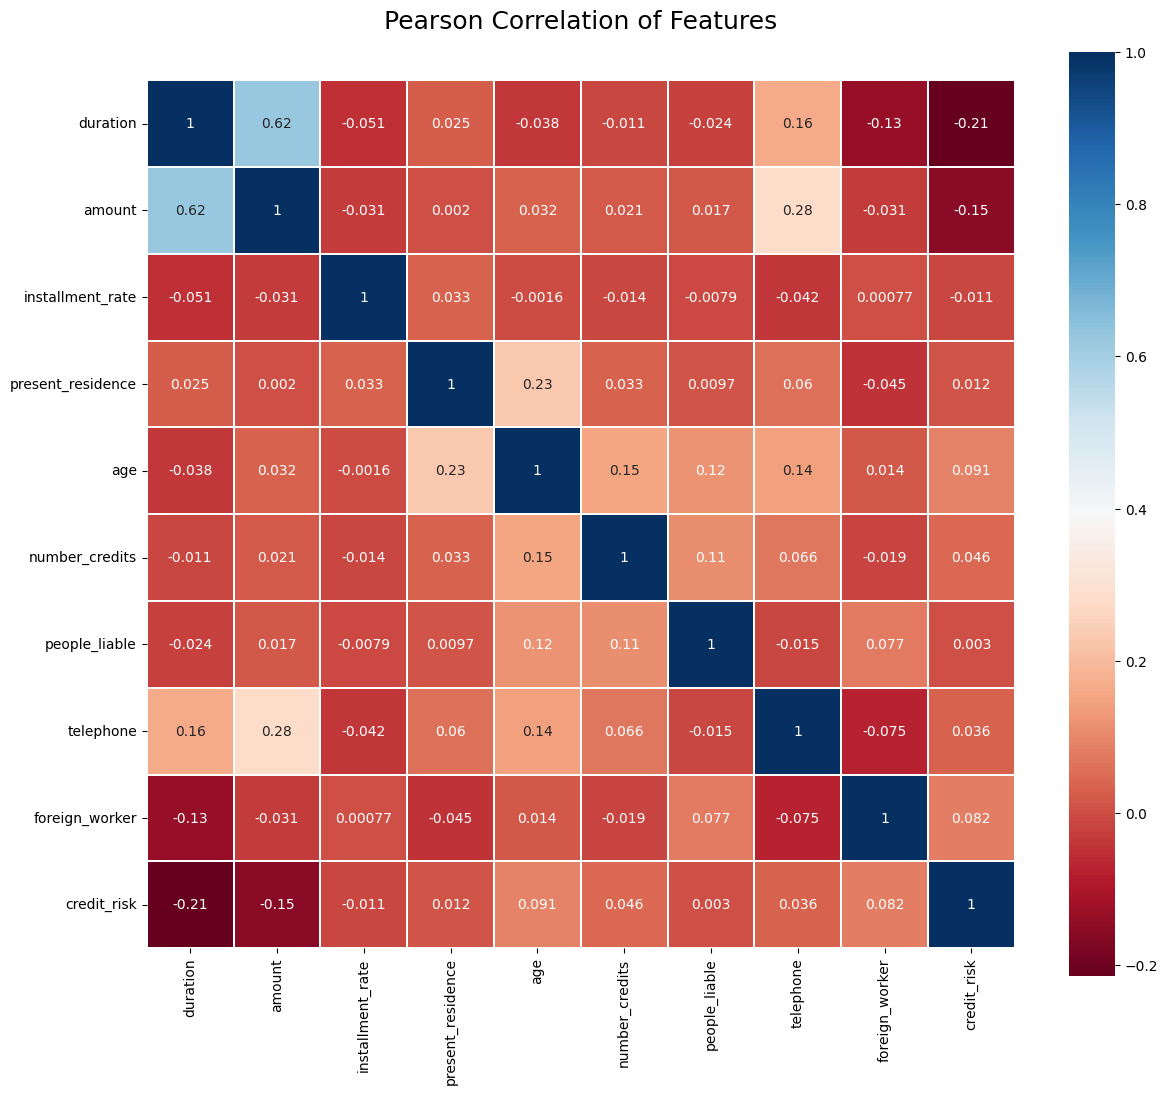

In [239]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.corr(),
            linewidths=0.1, vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)

Text(0, 0.5, 'amount')

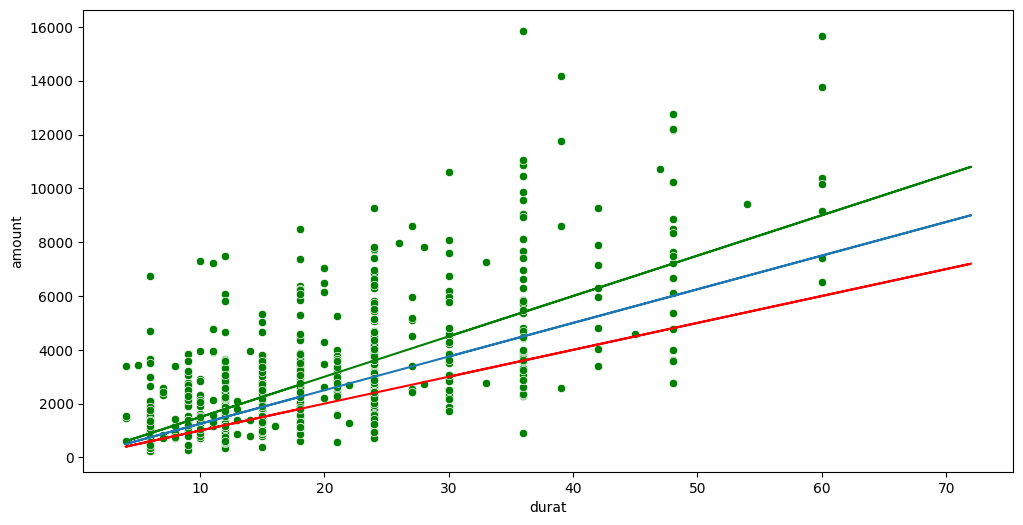

In [240]:
fig, ax = plt.subplots(figsize=(12, 6))
data1=data[data['credit_risk'] == 1]
sns.scatterplot(data=data1, x='duration', y='amount', color=['g'], legend = False)
plt.plot(data['duration'], data['duration'] * 100, color='r')
plt.plot(data['duration'], data['duration'] * 125)
plt.plot(data['duration'], data['duration'] * 150, color='g')
ax.set_xlabel('durat')
ax.set_ylabel('amount')

<Axes: xlabel='telephone', ylabel='amount'>

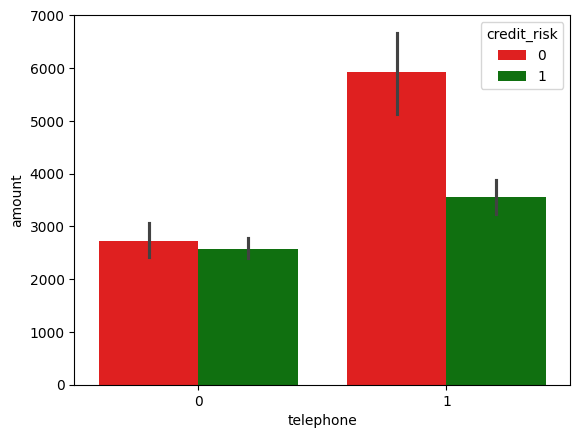

In [241]:
sns.barplot(x='telephone', y='amount', hue = 'credit_risk', data = data, palette = ['r', 'g'])


<Axes: xlabel='present_residence', ylabel='age'>

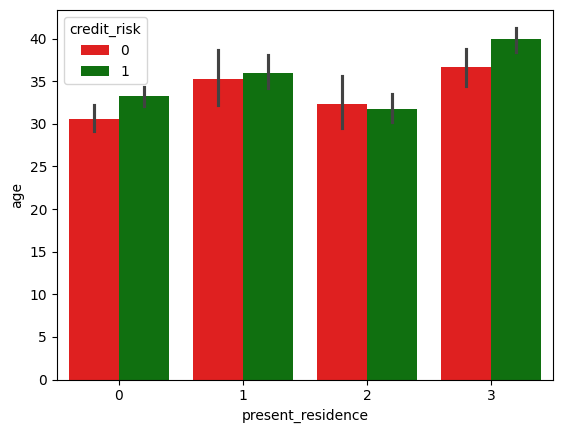

In [242]:
sns.barplot(x='present_residence', y='age', hue = 'credit_risk', data = data, palette = ['r', 'g'])
# 2013

<Axes: xlabel='telephone', ylabel='duration'>

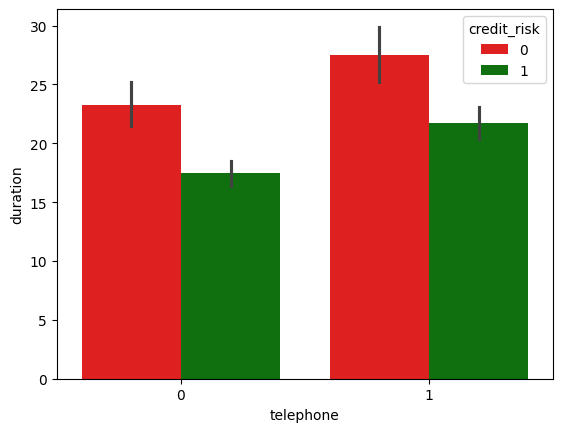

In [243]:
sns.barplot(x='telephone', y='duration', hue = 'credit_risk', data = data, palette = ['r', 'g'])
# 2013

<Axes: xlabel='number_credits', ylabel='age'>

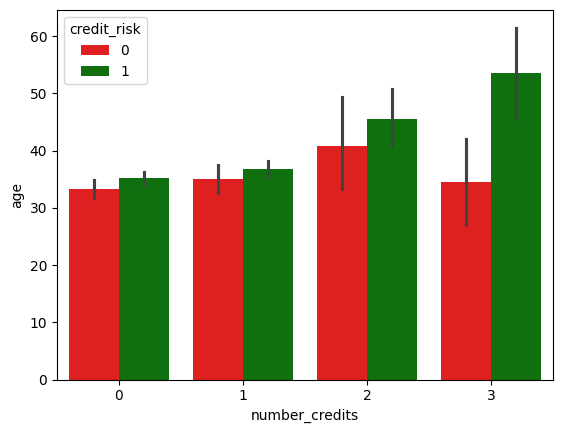

In [244]:
sns.barplot(x='number_credits', y='age', hue = 'credit_risk', data = data, palette = ['r', 'g'])
# data[(data['number_credits'] == 0) & (data['credit_risk'] == 1)]['age'].mean()

In [245]:
def predict(Xtest: np.array) -> np.array:
  sum = 0
  rez = []
  for i, row in Xtest.iterrows():
    # 1 sign
    if row['amount'] > (row['duration'] * 125):
      sum += 1

    # 2 sign
    mean_amount_tel_bad_risk = data[(data['telephone'] == row['telephone']) & (data['credit_risk'] == 0)]['amount'].mean()
    mean_amount_tel_good_risk = data[(data['telephone'] == row['telephone']) & (data['credit_risk'] == 1)]['amount'].mean()
    border = mean_amount_tel_bad_risk - (mean_amount_tel_bad_risk - mean_amount_tel_good_risk)/2
    if( row['amount'] < border).any():
      sum += 1

    # 3 sign
    mean_age_pres_bad_risk = data[(data['present_residence'] == row['present_residence']) & (data['credit_risk'] == 0)]['age'].mean()
    mean_age_pres_good_risk = data[(data['present_residence'] == row['present_residence']) & (data['credit_risk'] == 1)]['age'].mean()
    border = mean_age_pres_good_risk - (mean_age_pres_good_risk - mean_age_pres_bad_risk)/2
    if(row['age'] > border).any():
      sum+=1

    # 4 sign
    mean_durat_tel_bad_risk = data[(data['telephone'] == row['telephone']) & (data['credit_risk'] == 0)]['duration'].mean()
    mean_durat_tel_good_risk = data[(data['telephone'] == row['telephone']) & (data['credit_risk'] == 1)]['duration'].mean()
    border = mean_durat_tel_bad_risk - (mean_durat_tel_bad_risk - mean_durat_tel_good_risk)/2
    if( row['duration'] < border).any():
      sum += 1

    # 5 sign
    mean_age_numb_cred_bad_risk = data[(data['number_credits'] == row['number_credits']) & (data['credit_risk'] == 0)]['age'].mean()
    mean_age_numb_cred_good_risk = data[(data['number_credits'] == row['number_credits']) & (data['credit_risk'] == 1)]['age'].mean()
    border = mean_age_numb_cred_good_risk - (mean_age_numb_cred_good_risk - mean_age_numb_cred_bad_risk)/2
    if(row['age'] > border).any():
      sum+=1

    if(sum > 2):
      rez.append(1)
    else:
      rez.append(0)
  return rez

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', axis=1)
y = data['credit_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

0.664